[Original source](https://www.kaggle.com/datasets/vijayadityads/income-evaluation)
* `age`: continuous.

* `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-
pay, Never-worked.

* `fnlwgt`: final weight - number of people in the population that the surveyed individual or household represents.  continuous.

* `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-
8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

* `education-num`: continuous.

* `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-
spouse-absent, Married-AF-spouse.

* `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty,Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-
serv, Protective-serv, Armed-Forces.

* `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* `sex`: Female, Male.
* `capital-gain`: continuous.
* `capital-loss`: continuous.
* `hours-per-week`: continuous.

* `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-
US(Guam-USVI-etc.), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy,
Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador,
Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-
Salvador, Trinadad & Tobago, Peru, Hong, Holland-Netherlands.

### TASK
* ####  This dataset contains information of customers in bank, where you are working as Data Scientist. Through given variables you should predict whether a person makes less than 50K $ in a year.
Note: You should not use all variables. Define which parameters will be useful for you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

# Step 1. Familiarization with data

In [2]:
df = pd.read_excel("income_evaluation.xlsx")
data = df.copy()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We see a whitespace in all headers expect `age`

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We can see a large range in `capital-gain` and `fnlwgt`

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In cleaning step, we will drop this duplicated

In [5]:
df.duplicated().sum()

24

In `fnlwgt` and `capital-gain` we can see a massive outlier. Let's see them individually

<Axes: >

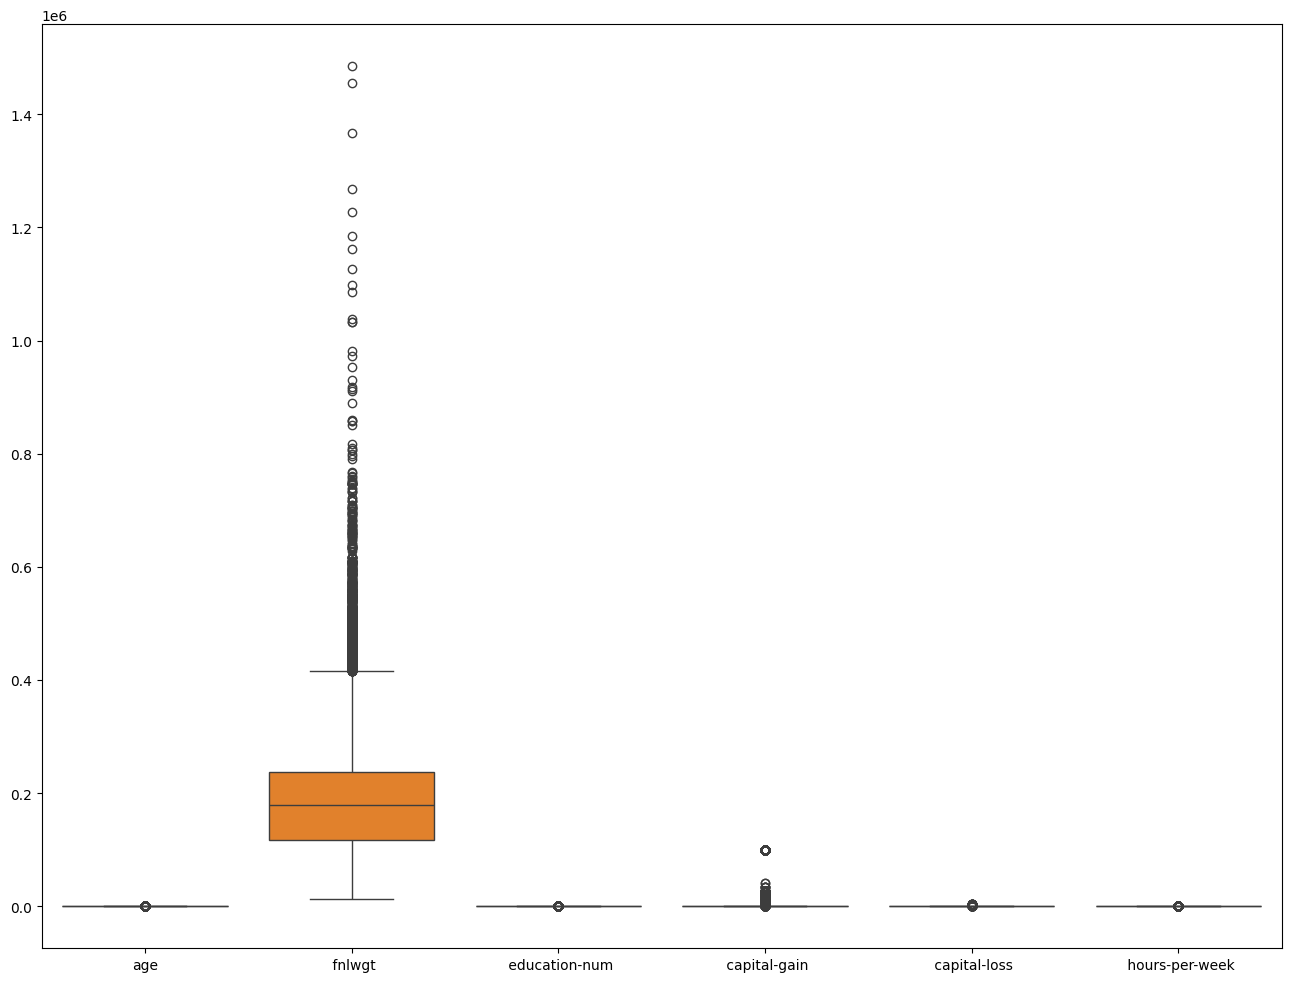

In [6]:
plt.figure(figsize=(16,12))
sns.boxplot(df)

Text(0.5, 1.0, 'Capital gain')

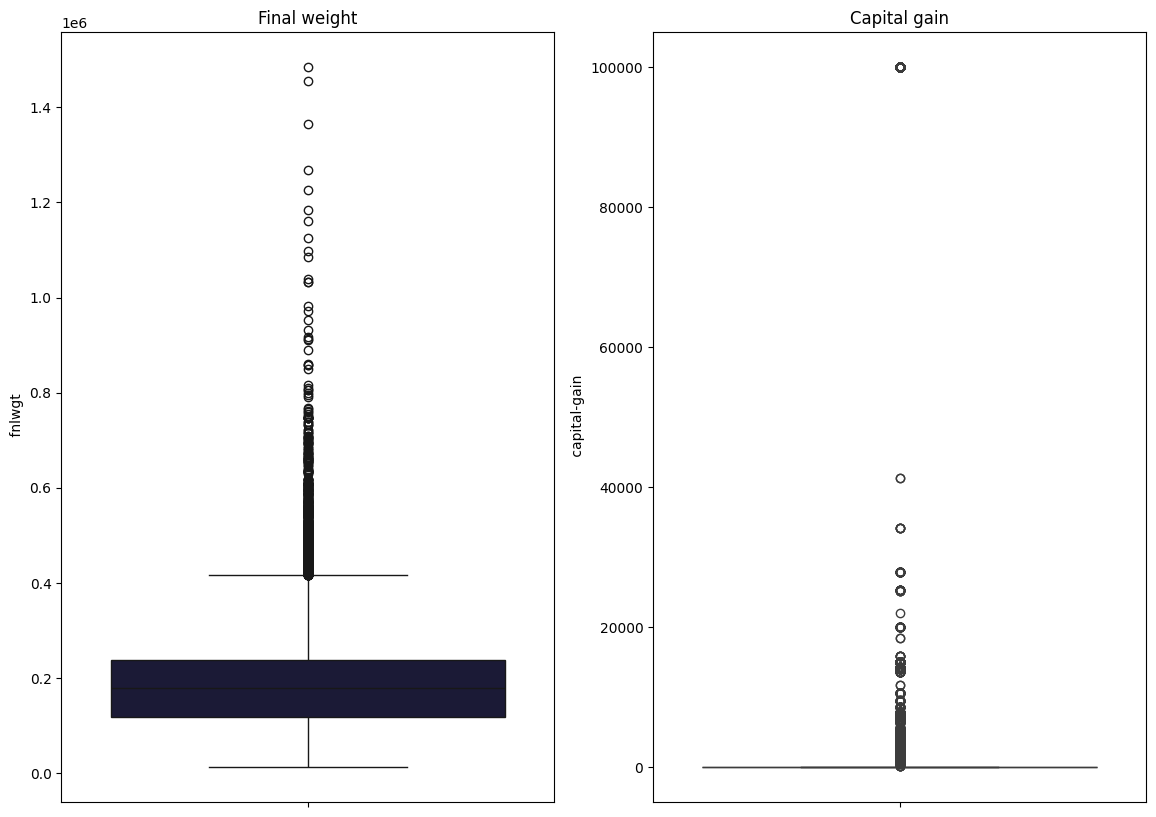

In [7]:
figure, axis = plt.subplots(1, 2,figsize=(14,10)) 

sns.boxplot(df[" fnlwgt"],ax=axis[0],color="#17153B")
axis[0].set_title('Final weight')

sns.boxplot(df[" capital-gain"],ax=axis[1],color="#433D8B")
axis[1].set_title('Capital gain')


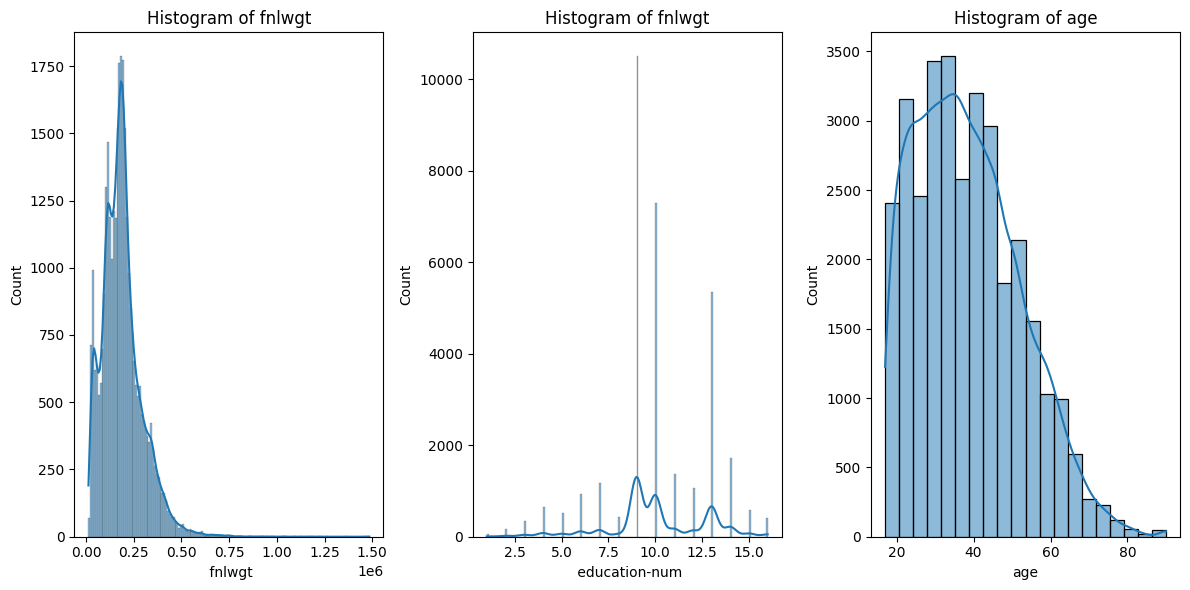

In [8]:
figure, axis = plt.subplots(1, 3, figsize=(12, 6))

sns.histplot(df[" fnlwgt"], bins=150, kde=True, ax=axis[0])
axis[0].set_title('Histogram of fnlwgt')

sns.histplot(df[" education-num"], bins=150, kde=True, ax=axis[1])
axis[1].set_title('Histogram of fnlwgt')

sns.histplot(df["age"], bins=20, kde=True, ax=axis[2])
axis[2].set_title('Histogram of age')

plt.tight_layout()
plt.show()

`Capital gain` and `Capital loss` is Negative Skew

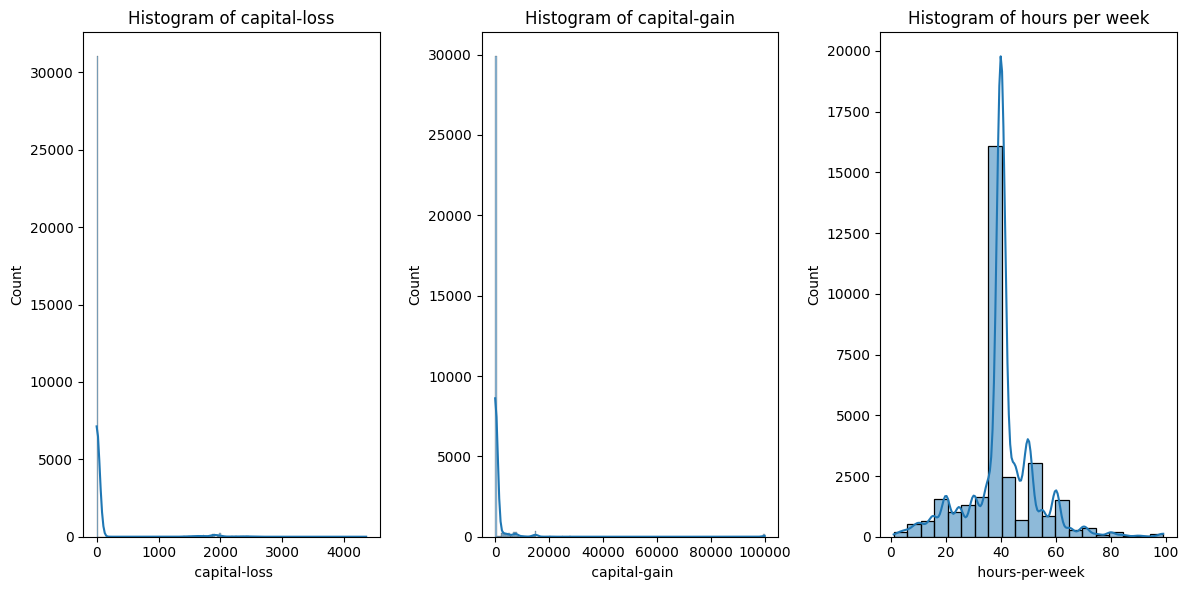

In [9]:
figure, axis = plt.subplots(1, 3, figsize=(12, 6))

sns.histplot(df[" capital-loss"], bins=150, kde=True, ax=axis[0])
axis[0].set_title('Histogram of capital-loss')

sns.histplot(df[" capital-gain"], bins=150, kde=True, ax=axis[1])
axis[1].set_title('Histogram of capital-gain')


sns.histplot(df[" hours-per-week"], bins=20, kde=True, ax=axis[2])
axis[2].set_title('Histogram of hours per week')

plt.tight_layout()
plt.show()

#### All correlation is to small
#### Target(income) is object, so we can't see corr between `income` and other features, so let's check corr after cleaning again

<Axes: >

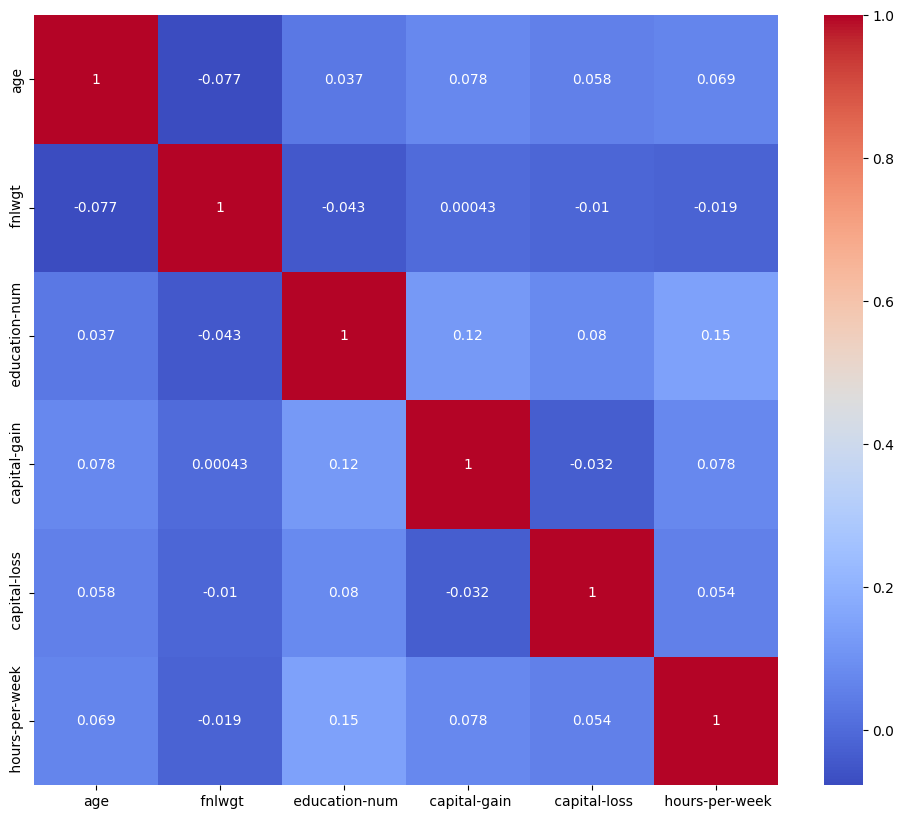

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df.select_dtypes(include="number").corr(),annot=True,cmap="coolwarm")

## Ckecking all object type columns

In [11]:
df.select_dtypes("object").columns

Index([' workclass', ' education', ' marital-status', ' occupation',
       ' relationship', ' race', ' sex', ' native-country', ' income'],
      dtype='object')

In number types, we have `education-num`. This is `education` label encoding variant, so we can drop education(in cleaning step)

In [12]:
df[" education"].value_counts()

 education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

* #### We see that `marital-status` and `relationship` describe almost the same thing.
* #### `martial-status` just is more detail(like `maried-civ` and `married-af spouse`)
* #### In `relationship` we can combine `Wife` and `Husband` in `Married` category

In [13]:
print(df[" marital-status"].value_counts(),"\n")
print(df[" relationship"].value_counts())

 marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64 

 relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64


We see a `?` in both, in cleaning step we need replace `?`. 
`occupation` is more abstract than `workclass`, so we left only workclass

In [14]:
print(df[" occupation"].value_counts(),"\n")
print(df[' workclass'].value_counts())

 occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64 

 workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


`?` again. And also wee see 42 country, this is too much for `one hot encoding', so have 3 choice
1. frequency encoding
2. target encoding
3. separete to continent 
#### I choice frequency encoding

In [15]:
print(f"Country count: {df[" native-country"].nunique()}","\n")
print(df[" native-country"].value_counts())

Country count: 42 

 native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                        

In [16]:
df[" sex"].value_counts()

 sex
Male      21790
Female    10771
Name: count, dtype: int64

`Amer-Indian-Eskimo` and `Asian-Pac-Islander` is too specific race, we can add this 2 race to `Other`

In [21]:
df[" race"].value_counts()

 race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

### Our target(Y). 
Impalanced data. We can use `over sampling`, `under sampling`, `smoteen`(oversample and undersample combine)

In [17]:
df[" income"].value_counts()

 income
<=50K    24720
>50K      7841
Name: count, dtype: int64

### In result
* ### delete all whitespace in headers  and replace '-' to '_'
* ### drop fnlwgt, occupation,education, marital-status
* ### replaced all '?' in `workclass` and `native-country`
* ### Replace some category in object columns to `Other` and reduce the amount of category
* ### clip `capital gain`  outliers
* ### Frequency encoding

## Cleaning
### Drop columns and delete all whitespaces

In [19]:
data.drop([" education", " fnlwgt", " occupation"," marital-status"],axis=1,inplace=True)

In [20]:
data.rename(columns=lambda x: x.strip(), inplace=True)
data.columns = data.columns.str.replace("-","_")
data.columns

Index(['age', 'workclass', 'education_num', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

### Delete all white space in all object columns

In [34]:
for obj_col in data.select_dtypes(include="object").columns:
    data[obj_col] = data[obj_col].str.strip()

### Replace all `?`  to mode in their columns

In [37]:
def replace_questionmark(col_name):
    col_mode =  data[col_name].mode()[0]
    data[col_name] = data[col_name].replace({"?": col_mode})
    print(data[col_name].value_counts())

replace_questionmark("native_country")

native_country
United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [38]:
replace_questionmark("workclass")

workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


### Replace some category in object columns to `Other` and reduce the amount of category


In [39]:
data.select_dtypes(include = "object").columns

Index(['workclass', 'relationship', 'race', 'sex', 'native_country', 'income'], dtype='object')

In [42]:
data["workclass"] = data["workclass"].replace({"Never-worked":"Other","Without-pay":"Other"})
data["workclass"].value_counts()

workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Other                  21
Name: count, dtype: int64